# **Laptop Analysis**

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [302]:
df = pd.read_csv('Laptops.csv')
df.head()

,id,Brand,Model Name,Processor,Operating System,Storage,RAM,Screen Size,Touch_Screen,Price
0,0,HP,15s-fq5007TU,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹38,990"
1,1,HP,15s-fy5003TU,Core i3,Windows 11 Home,512 GB,8 GB,39.62 cm (15.6 Inch),No,"₹37,990"
2,2,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"
3,3,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"
4,4,Apple,2020 Macbook Air,M1,Mac OS Big Sur,256 GB,8 GB,33.78 cm (13.3 inch),No,"₹70,990"


In [303]:
df.isnull().sum()

id                   0
Brand                0
Model Name           0
Processor            0
Operating System     0
Storage             12
RAM                  0
Screen Size          0
Touch_Screen         0
Price                0
dtype: int64

In [304]:
df['Storage'] = df['Storage'].fillna(df['Storage'].mode()[0])

In [305]:
df.isnull().sum()

id                  0
Brand               0
Model Name          0
Processor           0
Operating System    0
Storage             0
RAM                 0
Screen Size         0
Touch_Screen        0
Price               0
dtype: int64

In [306]:
pd.DataFrame(pd.DataFrame(df.groupby('Storage'))[0])

,0
0,1 TB
1,128 GB
2,2 TB
3,256 GB
4,3 TB
5,4 TB
6,512 GB
7,6 TB
8,64 GB


In [307]:
def convert_storage(storage):
    numeric_part, unit = storage[:-2], storage[-2:]
    numeric_part = int(numeric_part)
    if unit == 'TB':
        numeric_part *= 1024
    return numeric_part

df['Storage'] = df['Storage'].apply(convert_storage)

In [308]:
pd.DataFrame(pd.DataFrame(df.groupby('RAM'))[0])

,0
0,12 GB
1,16 GB
2,18 GB
3,32 GB
4,4 GB
5,64 GB
6,8 GB


In [309]:
pd.DataFrame(pd.DataFrame(df.groupby('Screen Size'))[0]).head()

,0
0,100.63 cm (39.62 cm)
1,17.78 cm (7 Inch)
2,26.67 cm (10.5 inch)
3,29.46 cm (11.6 Inch)
4,29.46 cm (11.6 inch)


In [310]:
df['RAM'] = df['RAM'].astype(str).str.extract('(\d+)').astype(int)
df['Screen Size'] = df['Screen Size'].astype(str).str.extract(r'([\d.]+)').astype(float)
df['Price'] = df['Price'].astype(str).str.replace(r'[^\d]', '', regex=True).astype(int)

In [311]:
pd.DataFrame(df['Screen Size']).head()

,Screen Size
0,39.62
1,39.62
2,33.78
3,33.78
4,33.78


## **1. Descriptive Analysis:**

#### What are the summary statistics (mean, median, min, max, standard deviation) for numeric attributes like storage, RAM, screen size, and price?

In [312]:
#Storage Analysis
print('Storage Analysis')
st_mean = round(df['Storage'].mean(), 2)
st_median = round(df['Storage'].median(), 2)
st_max = df['Storage'].max()
st_min = df['Storage'].min()
st_std = round(df['Storage'].std(), 2)
print(f'Mean of Storage is {st_mean} GB')
print(f'Median of Storage is {st_median} GB')
print(f'Maximum Storage is {st_max} GB')
print(f'Minimum of Storage is {st_min} GB')
print(f'Standard Deviation of Storage is {st_std} GB')
print()

#RAM Analysis
print('RAM Analysis')
st_ram = round(df['RAM'].mean(), 2)
st_ram = round(df['RAM'].median(), 2)
st_ram = df['RAM'].max()
st_ram = df['RAM'].min()
st_ram = round(df['RAM'].std(), 2)
print(f'Mean of RAM is {st_ram} GB')
print(f'Median of RAM is {st_ram} GB')
print(f'Maximum RAM is {st_ram} GB')
print(f'Minimum of RAM is {st_ram} GB')
print(f'Standard Deviation of RAM is {st_ram} GB')
print()

#Screen Size Analysis
print('Screen Size Analysis')
sc_mean = round(df['Screen Size'].mean(), 2)
sc_median = round(df['Screen Size'].median(), 2)
sc_max = df['Screen Size'].max()
sc_min = df['Screen Size'].min()
sc_std = round(df['Screen Size'].std(), 2)
print(f'Mean of Screen Size is {sc_mean} cm')
print(f'Median of Screen Size is {sc_median} cm')
print(f'Maximum Screen Size is {sc_max} cm')
print(f'Minimum of Screen Size is {sc_min} cm')
print(f'Standard Deviation of Screen Size is {sc_std} cm')
print()

#Price Analysis
print('Price Analysis')
p_mean = round(df['Price'].mean(), 2)
p_median = round(df['Price'].median(), 2)
p_max = df['Price'].max()
p_min = df['Price'].min()
p_std = round(df['Price'].std(), 2)
print(f'Mean of Price is ₹{p_mean}')
print(f'Median of Price is ₹{p_median}')
print(f'Maximum Price is ₹{p_max}')
print(f'Minimum of Price is ₹{p_min}')
print(f'Standard Deviation of Price is ₹{p_std}')

Storage Analysis
Mean of Storage is 640.46 GB
Median of Storage is 512.0 GB
Maximum Storage is 6144 GB
Minimum of Storage is 64 GB
Standard Deviation of Storage is 527.2 GB

RAM Analysis
Mean of RAM is 5.29 GB
Median of RAM is 5.29 GB
Maximum RAM is 5.29 GB
Minimum of RAM is 5.29 GB
Standard Deviation of RAM is 5.29 GB

Screen Size Analysis
Mean of Screen Size is 39.13 cm
Median of Screen Size is 39.62 cm
Maximum Screen Size is 100.63 cm
Minimum of Screen Size is 17.78 cm
Standard Deviation of Screen Size is 6.45 cm

Price Analysis
Mean of Price is ₹59919.02
Median of Price is ₹53990.0
Maximum Price is ₹489990
Minimum of Price is ₹11990
Standard Deviation of Price is ₹37594.12


#### How many unique brands are present in the dataset?

In [313]:
pd.DataFrame(pd.DataFrame(df.groupby('Brand'))[0])

,0
0,ASUS
1,Acer
2,Apple
3,CHUWI
4,DELL
5,GIGABYTE
6,HP
7,Infinix
8,LG
9,Lenovo


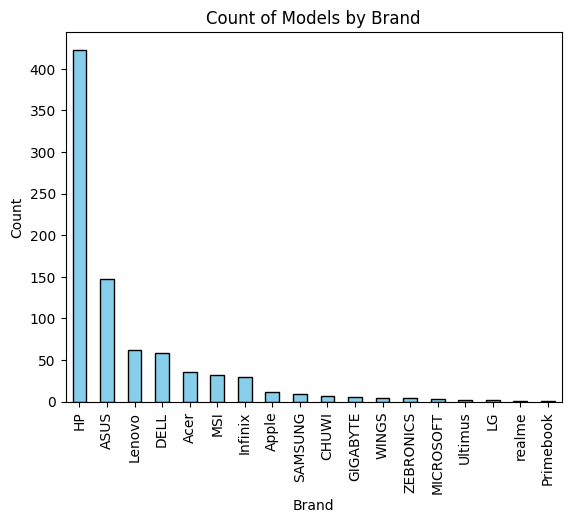

In [314]:
brand_counts = df['Brand'].value_counts()

brand_counts.plot(kind='bar',color='skyblue',edgecolor='black')

plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Count of Models by Brand')

plt.show()

#### What is the distribution of operating systems among the laptops?

In [315]:
pd.DataFrame(pd.DataFrame(df.groupby('Operating System'))[0])

,0
0,Chrome
1,DOS
2,Mac OS Big Sur
3,Mac OS Mojave
4,Mac OS Monterey
5,Prime OS
6,Ubuntu
7,Windows 10
8,Windows 10 Home
9,Windows 10 Pro


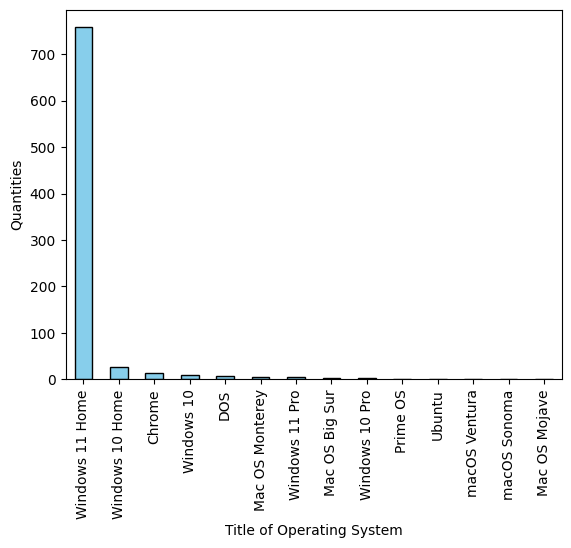

In [316]:
df['Operating System'].value_counts().plot(kind='bar',color='Skyblue',edgecolor='black')
plt.xlabel('Title of Operating System')
plt.ylabel('Quantities')
plt.show()

## **2. Exploratory Data Analysis (EDA):**

#### How does the distribution of storage capacity vary across different brands?

In [317]:
df.groupby('Brand')['Storage'].describe()

,count,mean,std,min,25%,50%,75%,max
Brand,,,,,,,,
ASUS,147.0,683.537415,457.173332,64.0,512.0,512.0,512.0,3072.0
Acer,36.0,508.444444,217.408693,128.0,512.0,512.0,512.0,1024.0
Apple,11.0,581.818182,363.680579,256.0,256.0,512.0,1024.0,1024.0
CHUWI,7.0,585.142857,320.912983,256.0,384.0,512.0,768.0,1024.0
DELL,59.0,581.423729,227.142687,256.0,512.0,512.0,512.0,1024.0
GIGABYTE,5.0,614.400000,228.973361,512.0,512.0,512.0,512.0,1024.0
HP,423.0,558.751773,178.624848,64.0,512.0,512.0,512.0,2048.0
Infinix,29.0,476.689655,239.213160,128.0,256.0,512.0,512.0,1024.0
LG,2.0,512.000000,0.000000,512.0,512.0,512.0,512.0,512.0


#### Is there any correlation between RAM and price?

In [318]:
round(df['RAM'].corr(df['Price']), 2)

0.72

#### What is the relationship between screen size and price?

In [319]:
rel = pd.DataFrame(df.groupby('Screen Size')['Price'].mean())

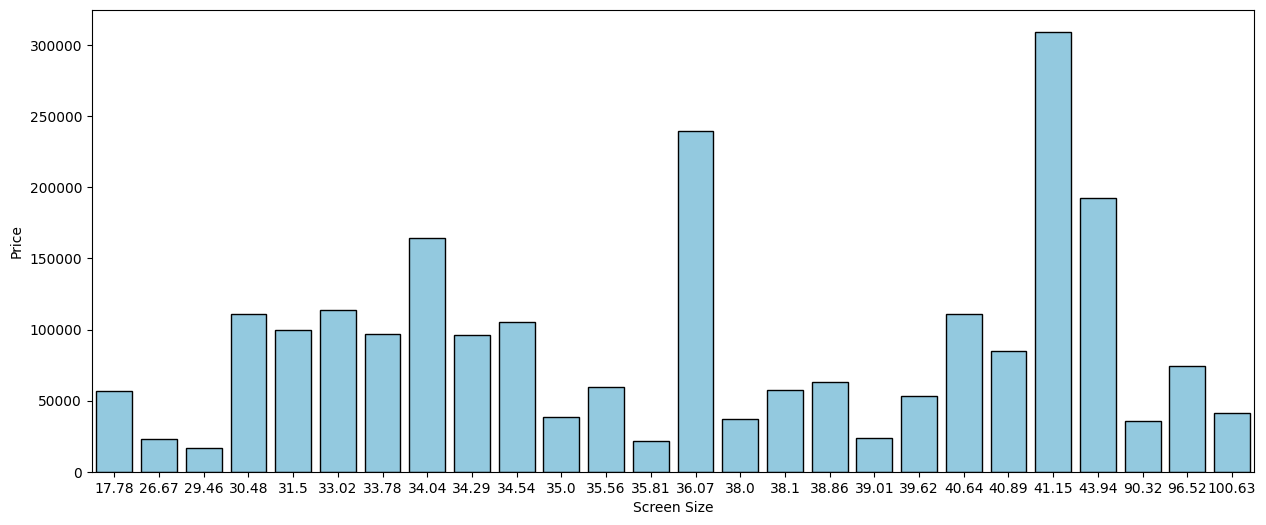

In [320]:
plt.figure(figsize=(15,6))
sns.barplot(rel['Price'],color='skyblue',edgecolor='black')
plt.show()

#### How does the presence of a touch screen affect the price of laptops?

In [321]:
pre = pd.DataFrame(df.groupby('Touch_Screen')['Price'].mean())

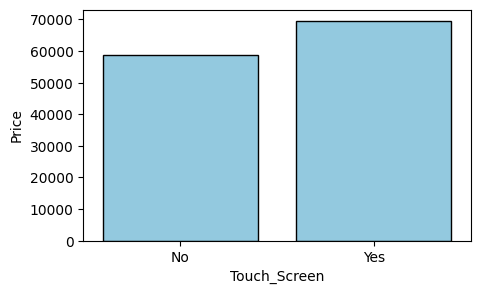

In [322]:
plt.figure(figsize=(5,3))
sns.barplot(pre['Price'],color='skyblue',edgecolor='black')
plt.show()

## **3. Visualization:**

#### Create a histogram to visualize the distribution of prices.

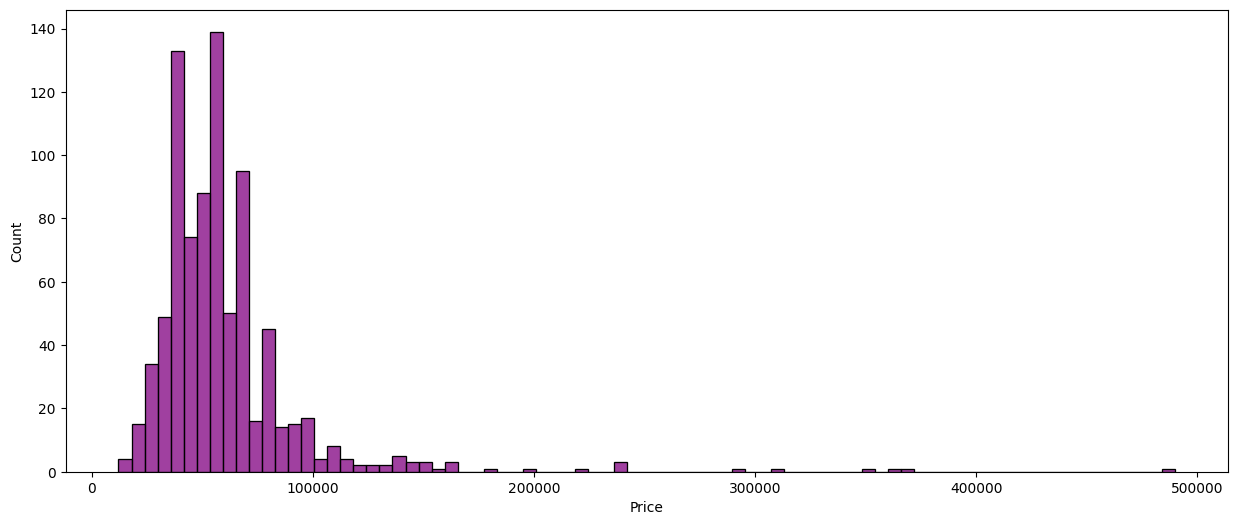

In [323]:
plt.figure(figsize=(15,6))
sns.histplot(df['Price'],color='purple',edgecolor='black')
plt.show()

#### Generate a bar chart to show the distribution of brands.

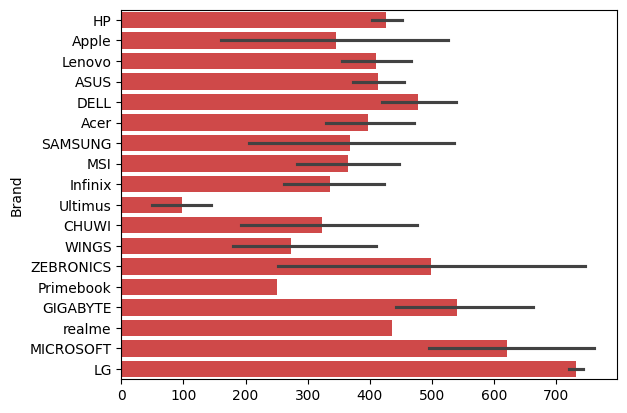

In [324]:
sns.barplot(df['Brand'],color=(0.9,0.2,0.2))
plt.show()

#### Plot a scatter plot to visualize the relationship between RAM and price.

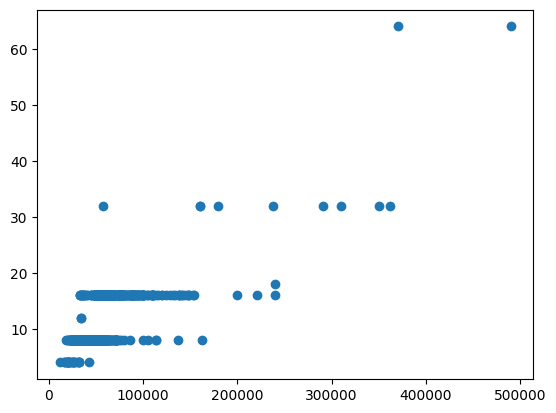

In [325]:
plt.scatter(df['Price'],df['RAM'])
plt.show()

#### Create a box plot to compare the distribution of prices across different operating systems.

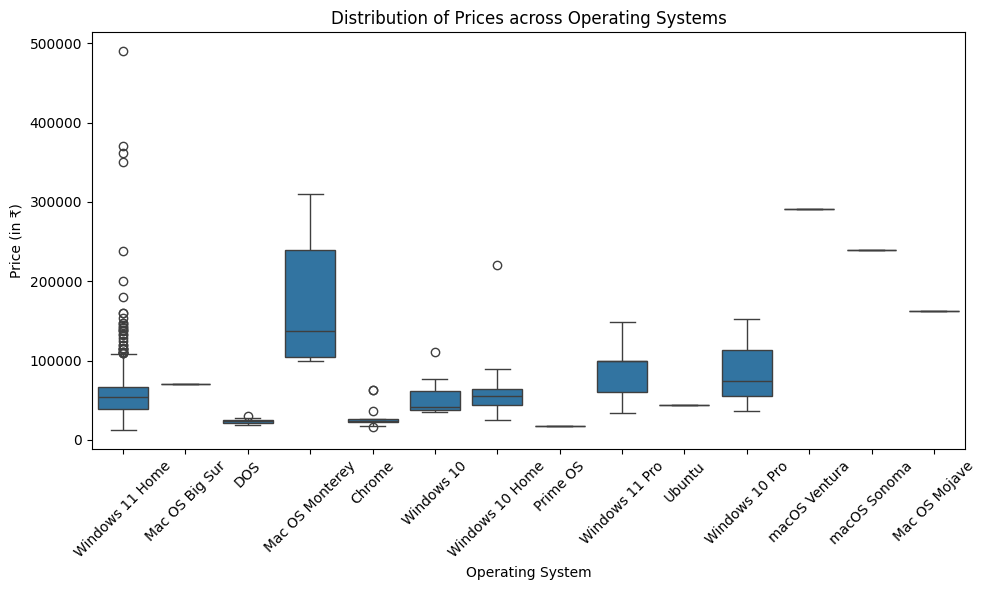

In [326]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Operating System', y='Price', data=df)

plt.xlabel('Operating System')
plt.ylabel('Price (in ₹)')
plt.title('Distribution of Prices across Operating Systems')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()